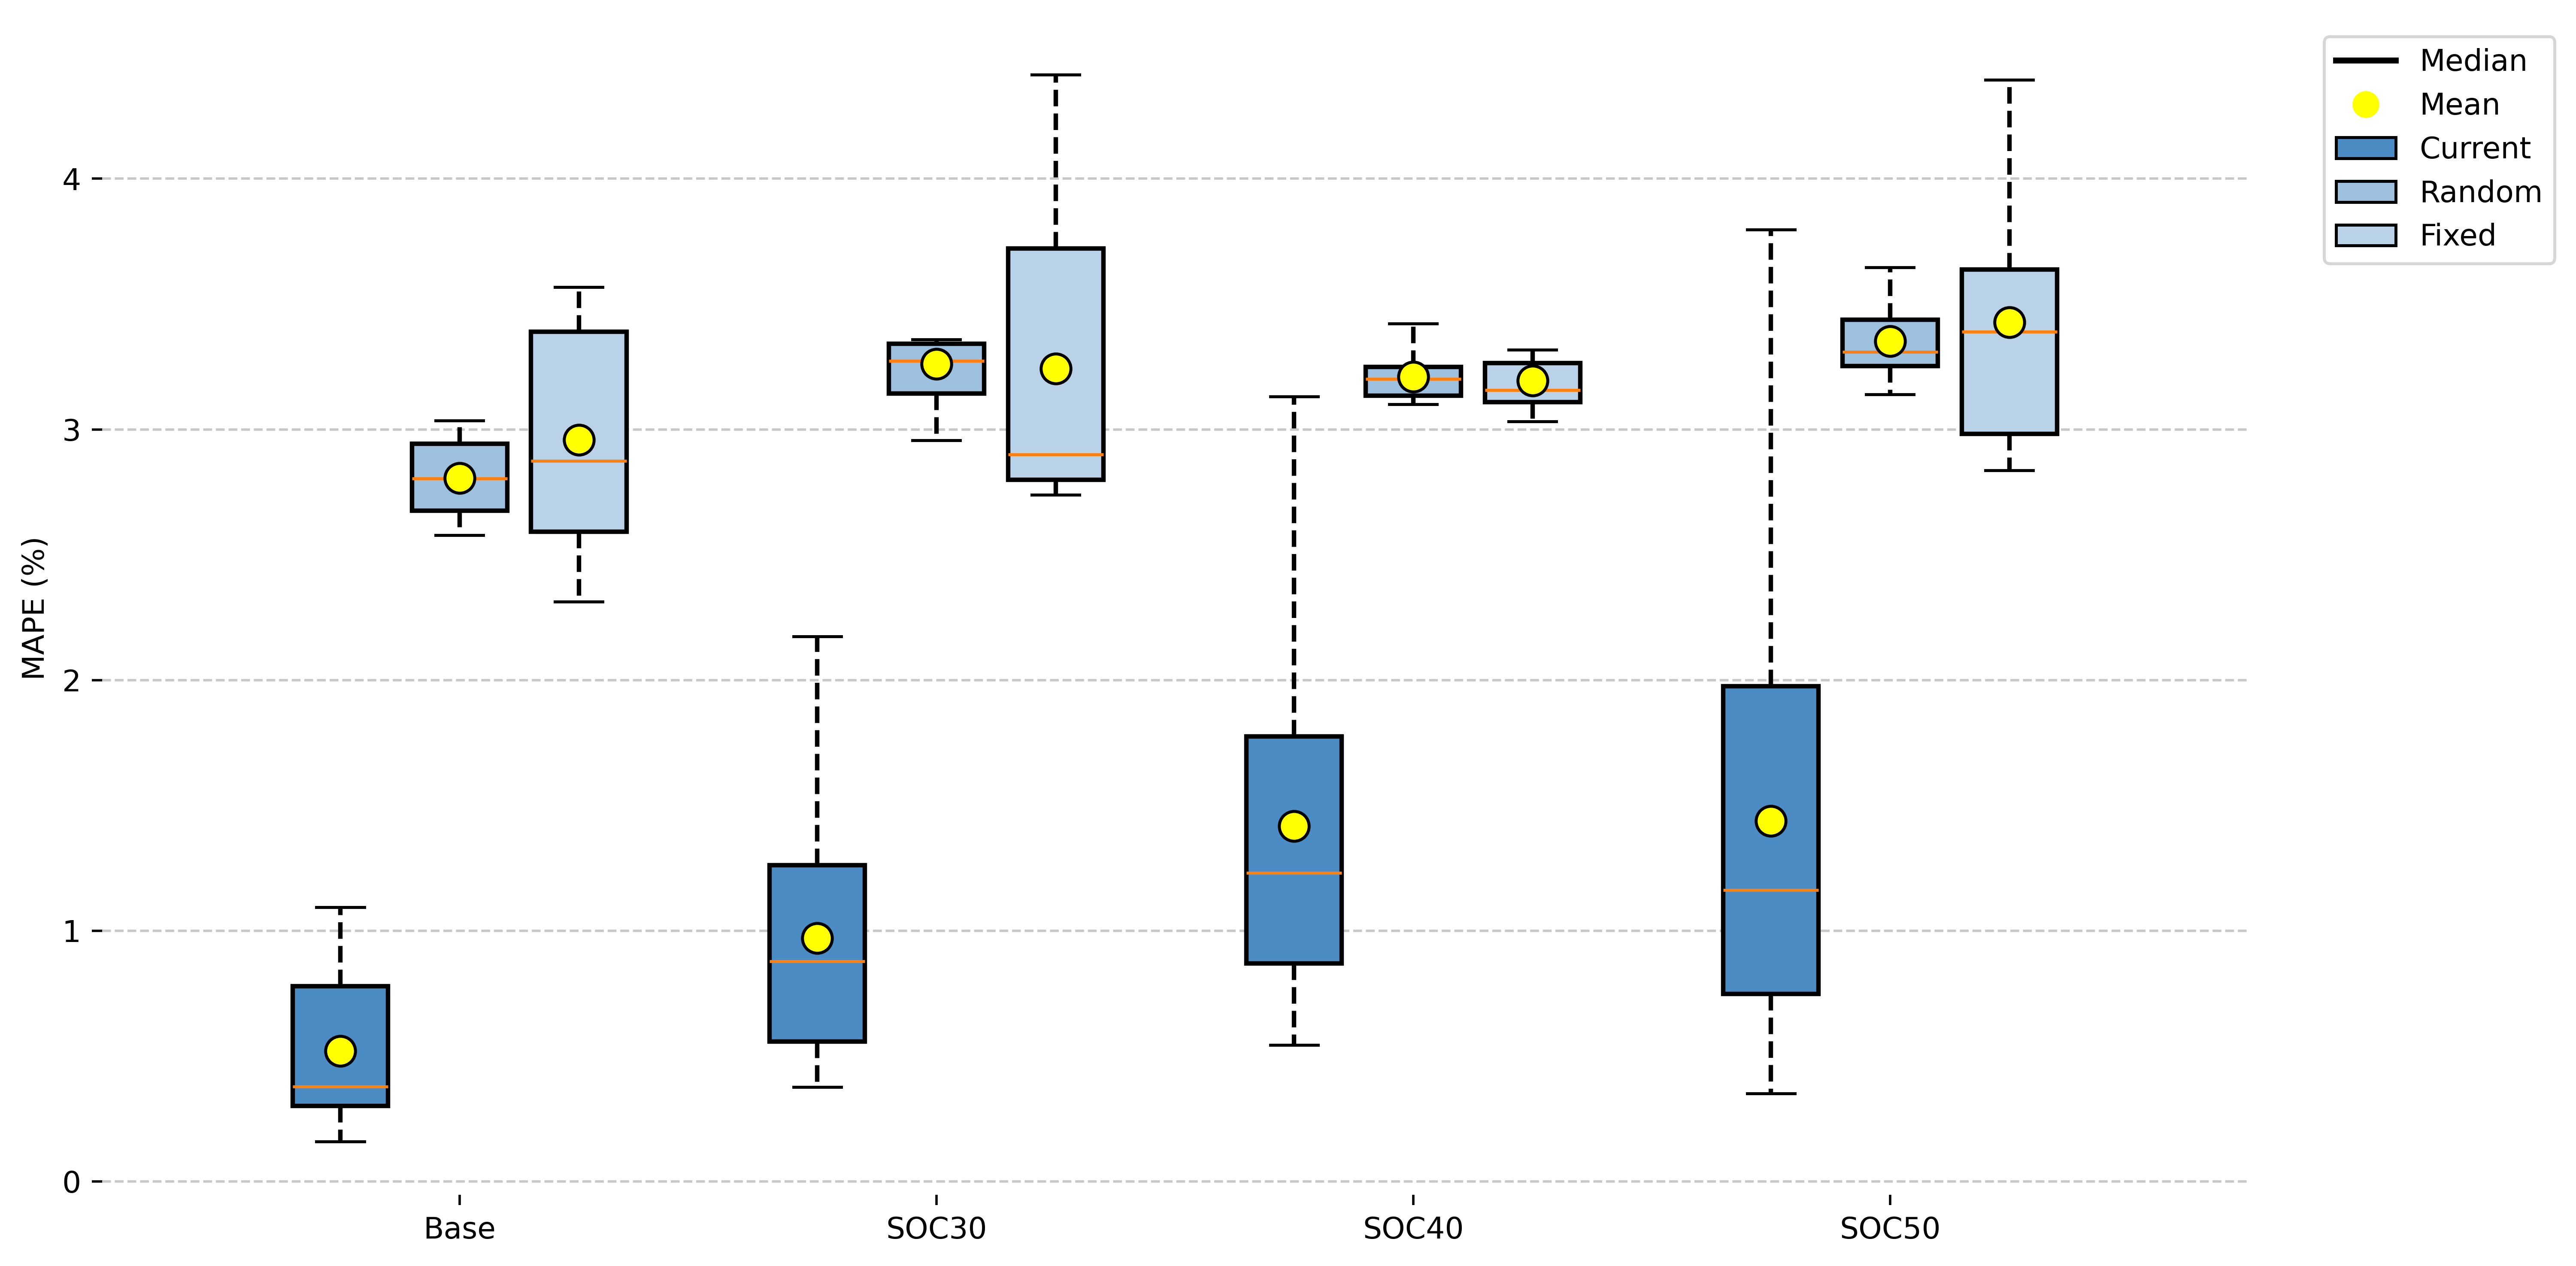

Detailed Statistics:
Model    Type     Mean      Std   Median  Count
 Base Current 0.520852 0.277880 0.377700    110
 Base   Fixed 2.957535 0.462756 2.874188     10
 Base  Random 2.806381 0.156970 2.804277     10
SOC30 Current 0.969704 0.493342 0.878416    110
SOC30   Fixed 3.242182 0.592649 2.900393     10
SOC30  Random 3.260605 0.198455 3.273883     10
SOC40 Current 1.416573 0.761539 1.230569    110
SOC40   Fixed 3.194071 0.238050 3.155979     10
SOC40  Random 3.209739 0.097602 3.201544     10
SOC50 Current 1.438266 0.842734 1.162866    110
SOC50   Fixed 3.426852 0.524227 3.389397     10
SOC50  Random 3.351535 0.152719 3.308410     10
Total data points: 520
Current models data points: 440
Random models data points: 40
Fixed models data points: 40


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def recreate_plot_from_raw_csv(csv_path):
    df = pd.read_csv(csv_path)
    
    stats_df = df.groupby(['Model', 'Type']).agg(
        Mean=('MAPE', 'mean'),
        Std=('MAPE', 'std'),
        Median=('MAPE', 'median'),
        Count=('MAPE', 'count')
    ).reset_index()
    
    models = df['Model'].unique()
    x = np.arange(len(models))
    width = 0.25
    colors = {'Current': '#4C8CC5', 'Random': '#9DC0DF', 'Fixed': '#B9D2E8'}
    
    plt.figure(figsize=(12, 6), dpi=500)
    ax = plt.gca()
    
    boxprops = {'linewidth': 1.5, 'edgecolor': 'black'}
    whiskerprops = {'linewidth': 1.5, 'linestyle': '--'}
    
    for i, model in enumerate(models):
        for j, (typ, color) in enumerate(colors.items()):
            pos = x[i] + (j-1)*width
            data = df[(df['Model']==model) & (df['Type']==typ)]['MAPE'].dropna()
            
            box = ax.boxplot(
                data, 
                positions=[pos], 
                widths=width*0.8,
                patch_artist=True,
                boxprops=dict(facecolor=color, **boxprops),
                whiskerprops=whiskerprops,
                showfliers=False
            )
            
            mean_val = stats_df[(stats_df['Model']==model) & (stats_df['Type']==typ)]['Mean'].values[0]
            ax.scatter(pos, mean_val, color='yellow', edgecolor='black', s=100, zorder=5, label='Mean' if i==0 and j==0 else "")
    
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], color='black', lw=2, label='Median'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Mean'),
        *[plt.Rectangle((0,0),1,1, fc=color, ec='black') for typ, color in colors.items()]
    ]
    ax.legend(legend_elements, ['Median', 'Mean'] + list(colors.keys()), 
              loc='upper right', bbox_to_anchor=(1.15, 1))
    
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.set_ylabel('MAPE (%)')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    print("="*60)
    print("Detailed Statistics:")
    print(stats_df.to_string(index=False))
    print("="*60)
    print(f"Total data points: {len(df)}")
    print(f"Current models data points: {len(df[df['Type']=='Current'])}")
    print(f"Random models data points: {len(df[df['Type']=='Random'])}")
    print(f"Fixed models data points: {len(df[df['Type']=='Fixed'])}")

if __name__ == "__main__":
    csv_path = r"D:\Gitload\PIMOE\Fig 3f\fig3f.csv"
    recreate_plot_from_raw_csv(csv_path)